In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pickle
import json

In [3]:
all_loaded_data = []
for i in range(1, 13):
  f = "data" + str(i) + ".pickle"
  if i == 1:
    f = "data.pickle"
  all_loaded_data += pickle.load(open(f, "rb"))

len(all_loaded_data)

288

In [4]:
all_loaded_data[0]

{'Meta Data': {'1. Information': 'Intraday (15min) open, high, low, close prices and volume',
  '2. Symbol': 'SPY',
  '3. Last Refreshed': '2000-01-31 16:30:00',
  '4. Interval': '15min',
  '5. Output Size': 'Full size',
  '6. Time Zone': 'US/Eastern'},
 'Time Series (15min)': {'2000-01-31 16:30:00': {'1. open': '90.5330',
   '2. high': '90.7130',
   '3. low': '90.2100',
   '4. close': '90.3810',
   '5. volume': '100'},
  '2000-01-31 16:15:00': {'1. open': '90.5330',
   '2. high': '90.7530',
   '3. low': '90.2100',
   '4. close': '90.4210',
   '5. volume': '22500'},
  '2000-01-31 16:00:00': {'1. open': '90.3710',
   '2. high': '90.7740',
   '3. low': '89.9470',
   '4. close': '90.3810',
   '5. volume': '572000'},
  '2000-01-31 15:45:00': {'1. open': '90.1680',
   '2. high': '90.6310',
   '3. low': '89.7650',
   '4. close': '90.3000',
   '5. volume': '904600'},
  '2000-01-31 15:30:00': {'1. open': '89.8430',
   '2. high': '90.3470',
   '3. low': '89.3610',
   '4. close': '89.9760',
   '

In [18]:
dfs = []

for data in all_loaded_data:
    time_zone = data['Meta Data']['6. Time Zone']

    df = pd.DataFrame(data['Time Series (15min)']).T
    df.columns = ['open', 'high', 'low', 'close', 'volume']
    df = df.astype({'open': 'float', 'high': 'float', 'low': 'float', 'close': 'float', 'volume': 'float'})

    df['time_zone'] = time_zone

    df.reset_index(inplace=True)
    df.rename(columns={'index': 'datetime_str'}, inplace=True)

    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)

In [19]:
df_all['datetime'] = pd.to_datetime(df_all['datetime_str'])
df_all 

,datetime_str,open,high,low,close,volume,time_zone,datetime
0,2000-01-31 16:30:00,90.533,90.713,90.210,90.381,100.0,US/Eastern,2000-01-31 16:30:00
1,2000-01-31 16:15:00,90.533,90.753,90.210,90.421,22500.0,US/Eastern,2000-01-31 16:15:00
2,2000-01-31 16:00:00,90.371,90.774,89.947,90.381,572000.0,US/Eastern,2000-01-31 16:00:00
3,2000-01-31 15:45:00,90.168,90.631,89.765,90.300,904600.0,US/Eastern,2000-01-31 15:45:00
4,2000-01-31 15:30:00,89.843,90.347,89.361,89.976,380500.0,US/Eastern,2000-01-31 15:30:00
...,...,...,...,...,...,...,...,...
339258,2023-12-01 05:00:00,457.070,457.070,456.950,457.010,2985.0,US/Eastern,2023-12-01 05:00:00
339259,2023-12-01 04:45:00,457.320,457.320,457.050,457.050,2907.0,US/Eastern,2023-12-01 04:45:00
339260,2023-12-01 04:30:00,457.240,457.340,457.190,457.270,1211.0,US/Eastern,2023-12-01 04:30:00
339261,2023-12-01 04:15:00,457.130,457.220,457.080,457.160,6102.0,US/Eastern,2023-12-01 04:15:00


In [20]:
df_all.sort_values(by=['datetime'], inplace=True)
df_all

,datetime_str,open,high,low,close,volume,time_zone,datetime
573,2000-01-03 09:30:00,96.168,96.359,94.997,95.238,554600.0,US/Eastern,2000-01-03 09:30:00
572,2000-01-03 09:45:00,95.357,95.811,94.674,94.954,408400.0,US/Eastern,2000-01-03 09:45:00
571,2000-01-03 10:00:00,95.236,95.689,94.775,95.238,532100.0,US/Eastern,2000-01-03 10:00:00
570,2000-01-03 10:15:00,95.357,95.709,94.734,95.177,140900.0,US/Eastern,2000-01-03 10:15:00
569,2000-01-03 10:30:00,95.337,95.527,93.927,94.104,303300.0,US/Eastern,2000-01-03 10:30:00
...,...,...,...,...,...,...,...,...
339097,2023-12-05 12:45:00,455.446,456.270,455.230,456.236,1298627.0,US/Eastern,2023-12-05 12:45:00
339096,2023-12-05 13:00:00,456.235,456.320,455.870,456.170,790104.0,US/Eastern,2023-12-05 13:00:00
339095,2023-12-05 13:15:00,456.170,456.570,456.130,456.330,1899511.0,US/Eastern,2023-12-05 13:15:00
339094,2023-12-05 13:30:00,456.330,456.530,455.980,456.377,729626.0,US/Eastern,2023-12-05 13:30:00


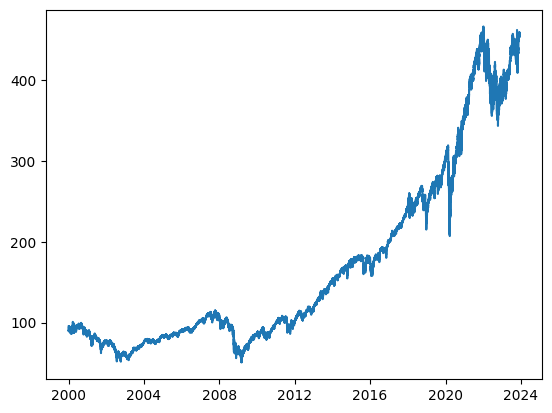

In [21]:
plt.plot(df_all['datetime'], df_all['close'])
plt.show()

In [22]:
df_all.drop(columns=['time_zone'], inplace=True)
df_all

,datetime_str,open,high,low,close,volume,datetime
573,2000-01-03 09:30:00,96.168,96.359,94.997,95.238,554600.0,2000-01-03 09:30:00
572,2000-01-03 09:45:00,95.357,95.811,94.674,94.954,408400.0,2000-01-03 09:45:00
571,2000-01-03 10:00:00,95.236,95.689,94.775,95.238,532100.0,2000-01-03 10:00:00
570,2000-01-03 10:15:00,95.357,95.709,94.734,95.177,140900.0,2000-01-03 10:15:00
569,2000-01-03 10:30:00,95.337,95.527,93.927,94.104,303300.0,2000-01-03 10:30:00
...,...,...,...,...,...,...,...
339097,2023-12-05 12:45:00,455.446,456.270,455.230,456.236,1298627.0,2023-12-05 12:45:00
339096,2023-12-05 13:00:00,456.235,456.320,455.870,456.170,790104.0,2023-12-05 13:00:00
339095,2023-12-05 13:15:00,456.170,456.570,456.130,456.330,1899511.0,2023-12-05 13:15:00
339094,2023-12-05 13:30:00,456.330,456.530,455.980,456.377,729626.0,2023-12-05 13:30:00


In [23]:
df_all['year'] = df_all['datetime'].dt.year
grouped = df_all.groupby('year')

for year, group in grouped:
    group = group.sort_values('datetime')

    data = group.drop(['year', 'datetime'], axis=1).to_dict('records')

    with open(f'{year}.json', 'w') as f:
        json.dump(data, f)